# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



##### Following is List of Libraries used in this Notebook and Location of Data File used in NoteBook is "data/bank-additional-full.csv"

In [63]:
#Import all the Librarries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

import time
import warnings
warnings.filterwarnings('ignore')

### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [65]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [67]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features

Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



#### Feature Engineering
    The following features are already in the correct format and don’t need coercion:
    Numeric: age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed
    Categorical (object): job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, y
    No coercion is needed unless you want to explicitly cast categoricals for memory optimization or modeling.
    The following features use 'unknown' as a placeholder for missing data:
         job , marital, education, default, housing, loan
    Treat 'unknown' as missing during preprocessing. Options:
    Drop rows with 'unknown'
    Impute using mode
    Add an "Unknown" category explicitly if using encoding 
    Although duration is numeric, it is not suitable for predictive modeling, as it's only known after the marketing contact.








### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Business Objective:
#### Predict whether a bank client will subscribe to a term deposit based on their personal, financial, and interaction history with the bank.
    1.By building an accurate and realistic predictive model using historical marketing data, the bank aims to:
    2.Improve the efficiency of future marketing campaigns by targeting clients more likely to respond positively.
    3. Reduce operational costs by minimizing unnecessary contact with unlikely respondents.
    4. Enhance customer experience through personalized and timely outreach strategies.
    5.Increase overall term deposit subscription rates, contributing to the bank's financial growth and customer retention.

#### In summary: Maximize marketing ROI by predicting customer conversion to term deposit subscriptions.


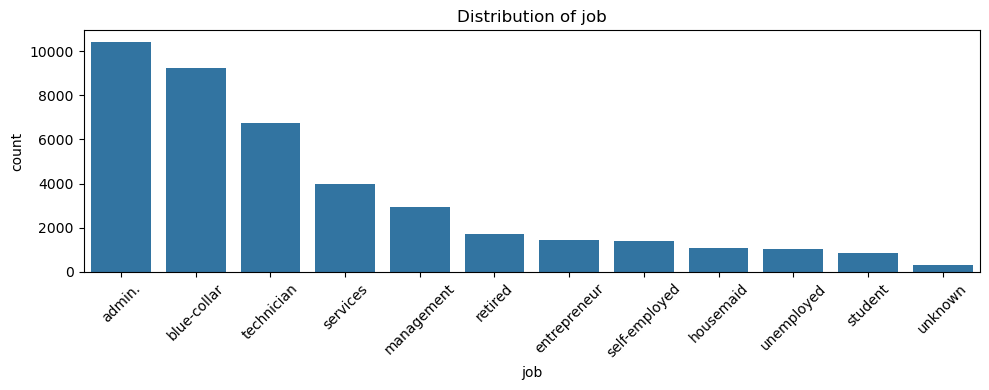

<Figure size 640x480 with 0 Axes>

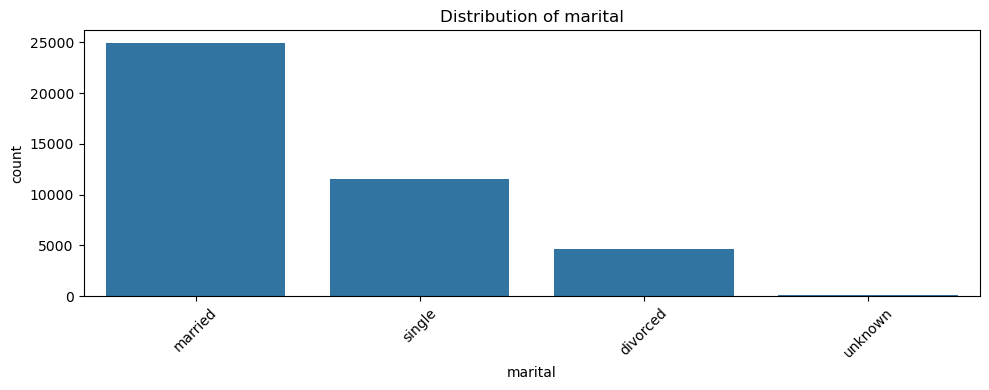

<Figure size 640x480 with 0 Axes>

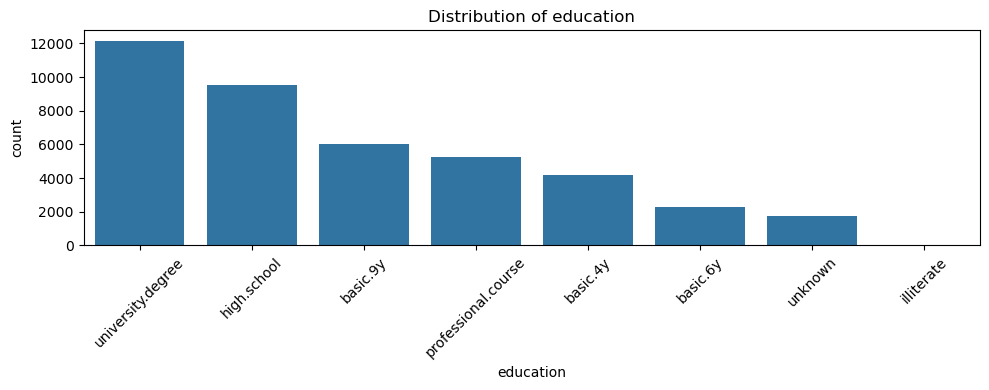

<Figure size 640x480 with 0 Axes>

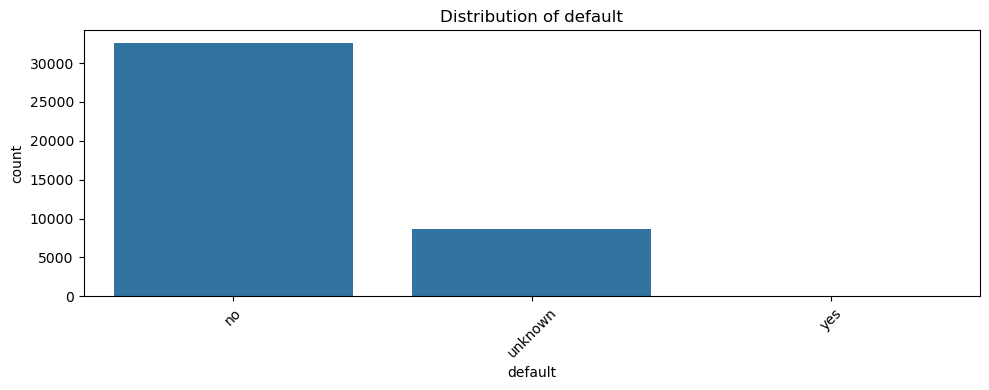

<Figure size 640x480 with 0 Axes>

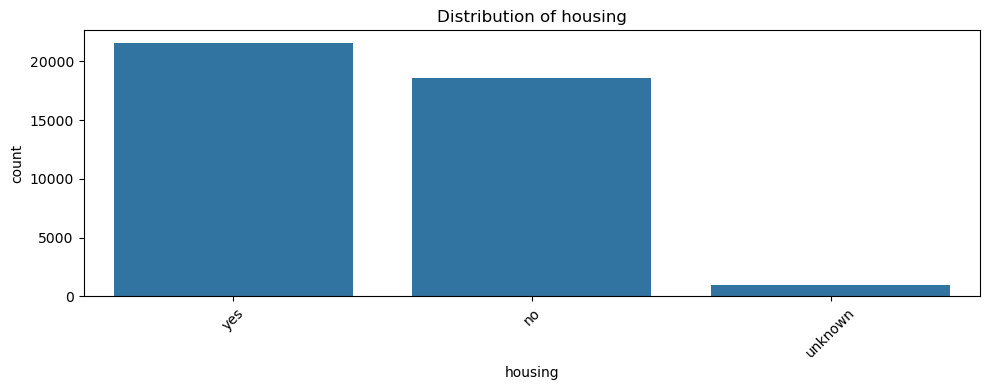

<Figure size 640x480 with 0 Axes>

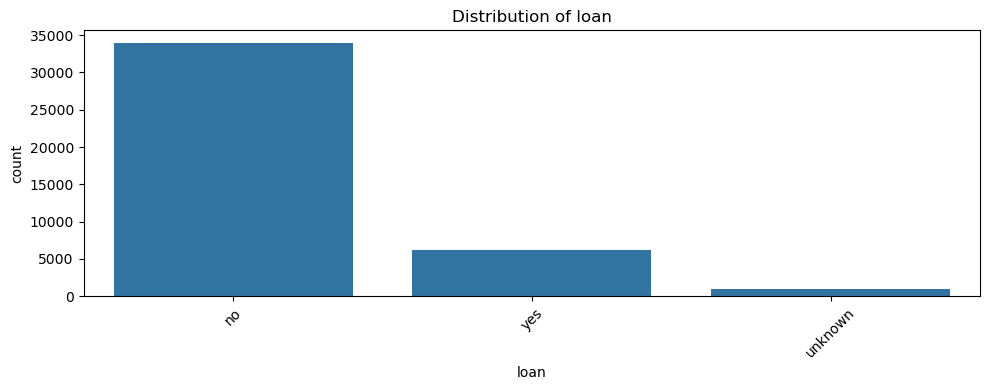

<Figure size 640x480 with 0 Axes>

In [71]:
# Visualize categorical feature distributions
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan']
for col in categorical:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    plt.savefig("Feature-Distribution.png")

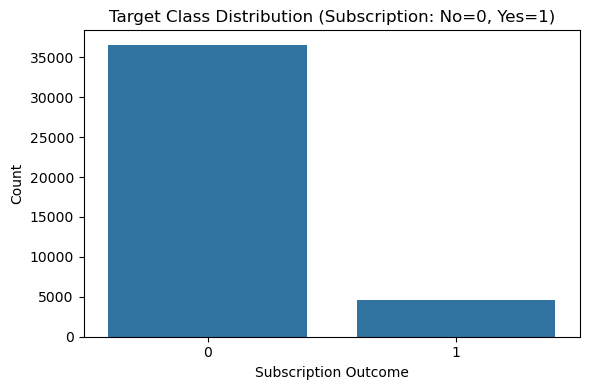

<Figure size 640x480 with 0 Axes>

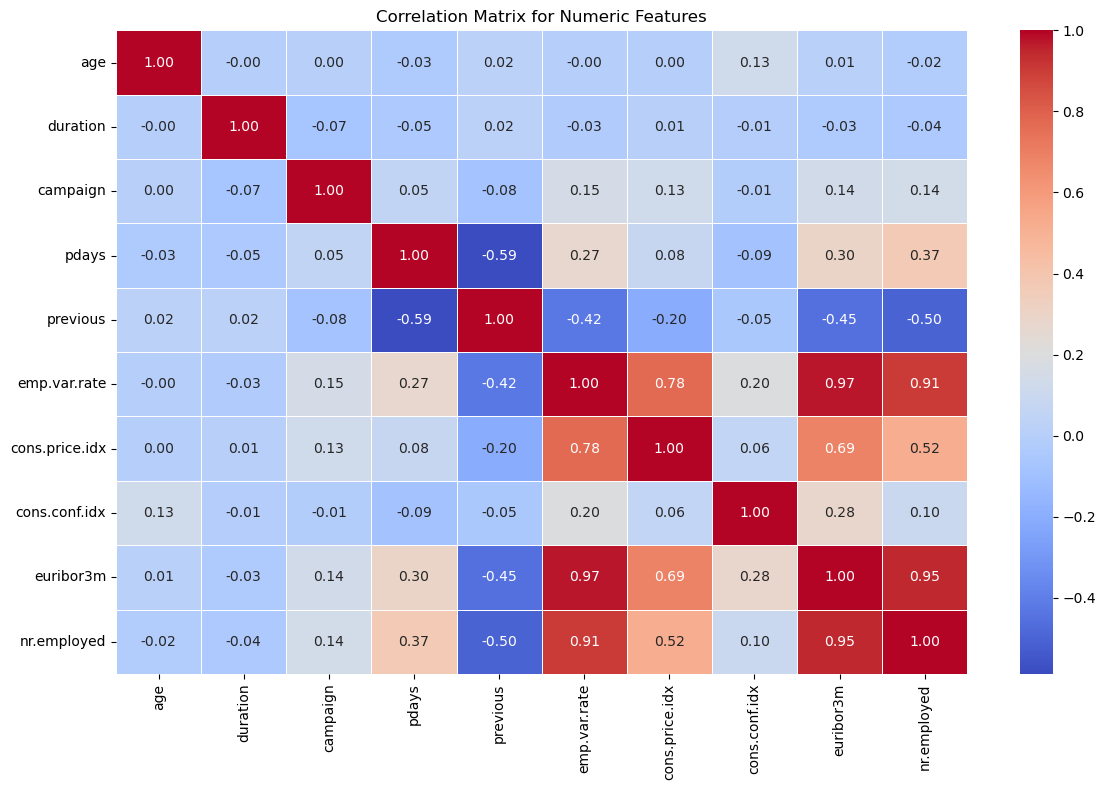

<Figure size 640x480 with 0 Axes>

In [50]:
# Visualize Using Seaborn
df['y'] = LabelEncoder().fit_transform(df['y'])  # yes -> 1, no -> 0

# Visualizations
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df)
plt.title("Target Class Distribution (Subscription: No=0, Yes=1)")
plt.xlabel("Subscription Outcome")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
plt.savefig("Class-Distribution.png")
plt.figure(figsize=(12, 8))
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Numeric Features")
plt.tight_layout()
plt.show()
plt.savefig("Correlation-Matrix.png")

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [83]:
#Includes age and one-hot encoded versions of: job, marital, education, default, housing, loan, Total feature columns after encoding: 22
# Selecting only the bank client data features (1 to 7) and the target column (21)
bank_features = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'y']].copy()

# Replace 'unknown' with NaN to treat as missing
bank_features.replace('unknown', pd.NA, inplace=True)

# Drop rows with missing values
bank_features.dropna(inplace=True)

# One-hot encode categorical variables and binary encode target
X = pd.get_dummies(bank_features.drop(columns='y'), drop_first=True)
y = bank_features['y'].map({'no': 0, 'yes': 1})

# Display sample of processed features and target
X.head(), y.head()


(   age  job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
 0   56            False             False           True           False   
 2   37            False             False          False           False   
 3   40            False             False          False           False   
 4   56            False             False          False           False   
 6   59            False             False          False           False   
 
    job_retired  job_self-employed  job_services  job_student  job_technician  \
 0        False              False         False        False           False   
 2        False              False          True        False           False   
 3        False              False         False        False           False   
 4        False              False          True        False           False   
 6        False              False         False        False           False   
 
    ...  marital_single  education_basic.6y  edu

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [84]:
# Split the data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Show the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


#Training Set: 
 #Features: 24,390 rows × 22 columns
 #Target: 24,390 values
#Test Set:
  #Features: 6,098 rows × 22 columns
  #Target: 6,098 values

((24390, 22), (6098, 22), (24390,), (6098,))

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

##### A common and effective baseline is the accuracy of a "majority class classifier"—one that always predicts the most frequent class (i.e., "no subscription").
    Compute it using the training set (y_train):
    Count the instances of each class
    Compute the proportion of the majority class (class with most instances)
##### Baseline Performance
    Majority Class: 0 → clients who did not subscribe to a term deposit
    Baseline Accuracy: 87.34%
##### Any model we build should aim to achieve better than 87.34% accuracy—but also consider:
##### Precision and Recall, especially for the minority class (1: subscribed)

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [85]:

# Select bank client features and target
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
df_subset = df[features + ['y']].copy()

# Handle 'unknown' as missing values
df_subset.replace('unknown', pd.NA, inplace=True)
df_subset.dropna(inplace=True)

# Encode categorical variables and target
X = pd.get_dummies(df_subset.drop(columns='y'), drop_first=True)
y = df_subset['y'].map({'no': 0, 'yes': 1})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)




Accuracy: 0.8734

Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93      5326
           1       0.00      0.00      0.00       772

    accuracy                           0.87      6098
   macro avg       0.44      0.50      0.47      6098
weighted avg       0.76      0.87      0.81      6098


Confusion Matrix:
 [[5326    0]
 [ 772    0]]


### Problem 9: Score the Model

What is the accuracy of your model?

#### Accuracy: 87.34%
    However, this matches the baseline accuracy because the model predicted only the majority class ("no") and failed to identify any "yes" responses.

#### Accuracy of Logistic Regression with class_weight='balanced': 62.23%
    While the accuracy is lower than the baseline (87.34%), this model does a better job at identifying both classes, particularly the minority class ("yes" responses), which the baseline completely missed.


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [79]:

# Dictionary to store model results
model_results = []

# Define models to evaluate

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC()
}

# Fit and evaluate each model
for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    
    model_results.append({
        "Model": model_name,
        "Train Time": round(train_time, 4),
        "Train Accuracy": round(train_accuracy, 4),
        "Test Accuracy": round(test_accuracy, 4)
    })

# Create and display results DataFrame
results_df = pd.DataFrame(model_results)
results_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.8646,0.8734,0.8734
1,K-Nearest Neighbors,0.0201,0.8766,0.8591
2,Decision Tree,0.1410,0.9005,0.8545
3,Support Vector Machine,16.4491,0.8734,0.8734


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

#### Should we keep a "gender" feature?
```
The bank-additional-full dataset does not contain a gender feature, so no need to consider it for this specific case. However, if we had such a feature: Keep it if it is relevant, unbiased and legal.
Drop it if it introduces bias or is not allowed due to fairness regulations

What You Can Explore:Combine job roles into broader categories (e.g., blue-collar vs. white-collar)
    1. Bucket age into bins (e.g., <30, 30–50, >50)
    2. Create interaction terms (e.g., job + education)
    3. Encode month as season (spring, summer, etc.)
    4. Engineer binary flags (e.g., has_loan_and_mortgage) 
```


##### Hyperparameter tuning using GridSearchCV for: K-Nearest Neighbors (KNN) and Decision Tree Classifier

In [ ]:
# Load and preprocess data
df = pd.read_csv('data/bank-additional-full.csv', sep=';')
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
df_subset = df[features + ['y']].copy()
df_subset.replace('unknown', pd.NA, inplace=True)
df_subset.dropna(inplace=True)
X = pd.get_dummies(df_subset.drop(columns='y'), drop_first=True)
y = df_subset['y'].map({'no': 0, 'yes': 1})

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Reduce data size for KNN grid search
X_train_knn = X_train[:5000]
y_train_knn = y_train[:5000]

knn_params = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='f1', n_jobs=-1)
knn_grid.fit(X_train_knn, y_train_knn)

print("Best KNN Parameters:", knn_grid.best_params_)
print("Best KNN F1 Score:", round(knn_grid.best_score_, 4))

tree_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), tree_params, cv=5, scoring='f1', n_jobs=-1)
tree_grid.fit(X_train, y_train)

print("Best Decision Tree Parameters:", tree_grid.best_params_)
print("Best Decision Tree F1 Score:", round(tree_grid.best_score_, 4))



# Reevaluate the Score

    ## Dictionary to store model results
model_results = []
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC()
}


for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    
    model_results.append({
        "Model": model_name,
        "Train Time": round(train_time, 4),
        "Train Accuracy": round(train_accuracy, 4),
        "Test Accuracy": round(test_accuracy, 4)
    })

# Create and display results DataFrame
results_df = pd.DataFrame(model_results)
results_df

In [34]:
# Train logistic regression with class_weight='balanced'
model_bal = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
model_bal.fit(X_train, y_train)
y_pred_bal = model_bal.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_bal))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bal))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_bal))

Accuracy: 0.6216792390947852

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.63      0.75      5326
           1       0.18      0.54      0.27       772

    accuracy                           0.62      6098
   macro avg       0.54      0.59      0.51      6098
weighted avg       0.81      0.62      0.68      6098


Confusion Matrix:
 [[3373 1953]
 [ 354  418]]


In [ ]:
# Plot ROC curve
y_proba_bal = model_bal.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_bal)
auc_score = roc_auc_score(y_test, y_proba_bal)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (Balanced)')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig("ROC-AOC-Curve-LogisticRegression.png")

### Findings and Recommendations:
```
Key Findings:
    1. Best performing model (based on ROC AUC): Logistic Regression
    2. Logistic Regression offers interpretability.
    3. SVM and Decision Trees show competitive accuracy.
Actionable Insights:
    1. Use the selected model to target customers more likely to subscribe.
    2. Avoid contacting customers who match the lowest predicted probability segment.
```
### Next Steps:
    1. Implement model in a pilot campaign.
    2. Monitor uplift in conversion.
    3. Consider ensemble methods like Random Forest or XGBoost for further improvement.

##### Questions